## 单变量房价预测

In [25]:
# 在Jupyter Notebook中安装需要的lib
!pip install pandas
!pip install matplotlib --upgrade
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple seaborn
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple numpy

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
Requirement already up-to-date: matplotlib in /usr/local/lib/python2.7/dist-packages (2.2.4)
You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop 

In [27]:
# pandas用于快速读取CSV到Data Frame(推荐的数据存储接口)
import pandas as pd
# seaborn提供2D库matplotlib的高级接口封装
import seaborn as sns
# seaborn2D图样式设置
sns.set(context="notebook", style="whitegrid", palette="dark")

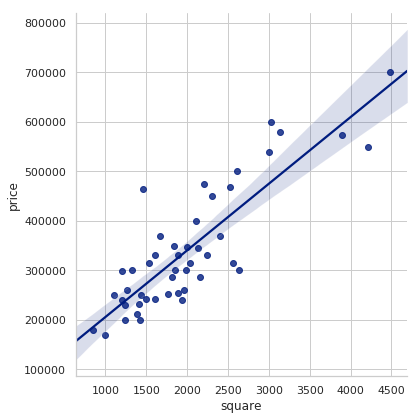

In [28]:
# 用pandas读取一个2列的csv到Data Frame df0
df0 = pd.read_csv('data0.csv', names=['square', 'price'])
# seaborn.lmplot专门用于线性关系的可视化
sns.lmplot('square', 'price', df0, height=6, fit_reg=True)

In [29]:
# 打印data frame的维度信息
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
square    47 non-null int64
price     47 non-null int64
dtypes: int64(2)
memory usage: 824.0 bytes


## 多变量房价预测

In [30]:
# python 2D绘图库
import matplotlib.pyplot as plt
# python 3D绘图库
from mpl_toolkits import mplot3d
# 读取3列的csv
df1 = pd.read_csv('data1.csv', names=['square', 'bedrooms', 'price'])
# 跳过表头
df1.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


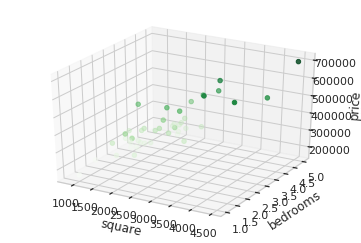

In [31]:
fig = plt.figure()
# 创建一个 Axes3D object
ax = plt.axes(projection='3d')
# 设置 3 个坐标轴的名称
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
# 绘制 3D 散点图
ax.scatter3D(df1['square'], df1['bedrooms'], df1['price'], c=df1['price'], cmap='Greens')

## 数据规范化

In [32]:
# 用于数据规范化的lambda表达式
def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())
# 对data frame的数据规范化为”(x - 均值)/标准差" 
df = normalize_feature(df1)
# 跳过表头
df.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


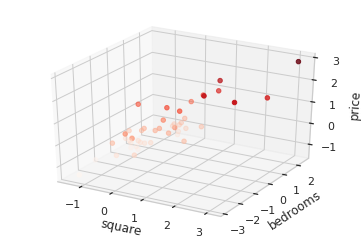

In [33]:
# 设置一个 Axes3D object
ax = plt.axes(projection='3d')
# 设置 3 个坐标轴的名称
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
# 绘制 3D 散点图
ax.scatter3D(df['square'], df['bedrooms'], df['price'], c=df['price'], cmap='Reds')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
square      47 non-null float64
bedrooms    47 non-null float64
price       47 non-null float64
dtypes: float64(3)
memory usage: 1.2 KB


## 数据处理：添加 ones 列（x0）

In [35]:
import numpy as np
# ones是n行1列的数据框，表示x0恒为1
ones = pd.DataFrame({'ones': np.ones(len(df))}) 

In [36]:
ones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 1 columns):
ones    47 non-null float64
dtypes: float64(1)
memory usage: 448.0 bytes


In [23]:
# 根据列合并数据
df = pd.concat([ones, df], axis=1)  
df.head()

,ones,square,bedrooms,price
0,1.0,0.130010,-0.223675,0.475747
1,1.0,-0.504190,-0.223675,-0.084074
2,1.0,0.502476,-0.223675,0.228626
3,1.0,-0.735723,-1.537767,-0.867025
4,1.0,1.257476,1.090417,1.595389


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
ones        47 non-null float64
square      47 non-null float64
bedrooms    47 non-null float64
price       47 non-null float64
dtypes: float64(4)
memory usage: 1.5 KB
